In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np

In [4]:
data_dict = {}
renames = {
    "jdk" : "JVM",
    "graal": "GVM",
    "regular": "Regular",
    "dispatch-no-trees" : "-DTree",
    "dispatch-no-cache" : "-DCache",
    "pure-meta": "-Hybrid",
    "queens2" : "queens",
    "heavy-overloading" : "Overload",
    "pure-loops": "PureLoop",
    "native-persistent-env": "NatPersist",
    "native-mutable-env": "NatMutable"
}
for file in os.listdir("../"):
    if file.endswith(".txt"):
        filename, _ = os.path.splitext(file)
        workload, tiger, dynsem, vm = filename.split('_')
        workload = renames[workload] if workload in renames else workload
        tiger = renames[tiger] if tiger in renames else tiger
#         dynsem = renames[dynsem] if dynsem in renames else dynsem
        vm = renames[vm] if vm in renames else vm
        key = (workload, "{} {}".format(tiger, vm))
        with open('../{}'.format(file)) as f:
            try:
                lines = f.readlines()
                lls = [int(e.strip()) for e in lines[:-1]]
                data_dict[key] = lls
            except:
                print(file)

# pd.DataFrame(data_dict)['sieve']

In [7]:
df = pd.DataFrame(data_dict)[10:].reset_index(drop="true")

df.columns = pd.MultiIndex.from_tuples(df.columns, names=['Benchmark','Flavor'])

benchmarks = list({b[0] for b in data_dict.keys()})

df.sort_index(axis=1, inplace=True)

meds = df.median()
for benchmark in benchmarks:
    basepoint = meds[benchmark]['NatPersist JVM']
    meds[benchmark] = basepoint / meds[benchmark]
speedups = meds
speedups

# for benchmark in benchmarks:
#     median_jdk = df[benchmark]['NatPersist JVM'].median()
#     df[benchmark] = median_jdk / df[benchmark]
#     
# speedups = df.median()

# speedups
# speedups = speedups.reindex(sorted(list(speedups.index.get_level_values(1).unique())), level='Flavor')
# speedups
## --- 
## speedups = speedups.swaplevel(i="Benchmark", j="Flavor")
## speedups = speedups.reindex(list(reversed(list(speedups.index.get_level_values(0).unique()))), level='Flavor')

Benchmark   Flavor        
list        NatMutable JVM    3.916667
            NatPersist JVM    1.000000
            Overload GVM      0.074485
            Overload JVM      0.014242
            PureLoop GVM      0.839286
            PureLoop JVM      0.046078
            Regular GVM       0.474747
            Regular JVM       0.091085
permute     NatMutable JVM    6.416667
            NatPersist JVM    1.000000
            Overload GVM      0.379310
            Overload JVM      0.062298
            PureLoop GVM      0.379310
            PureLoop JVM      0.082265
            Regular GVM       0.484277
            Regular JVM       0.124394
queens      NatMutable JVM    2.833333
            NatPersist JVM    1.000000
            Overload GVM      0.653846
            Overload JVM      0.097143
            PureLoop GVM      1.062500
            PureLoop JVM      0.195402
            Regular GVM       1.416667
            Regular JVM       0.340000
sieve       NatMutable JVM    2.38461

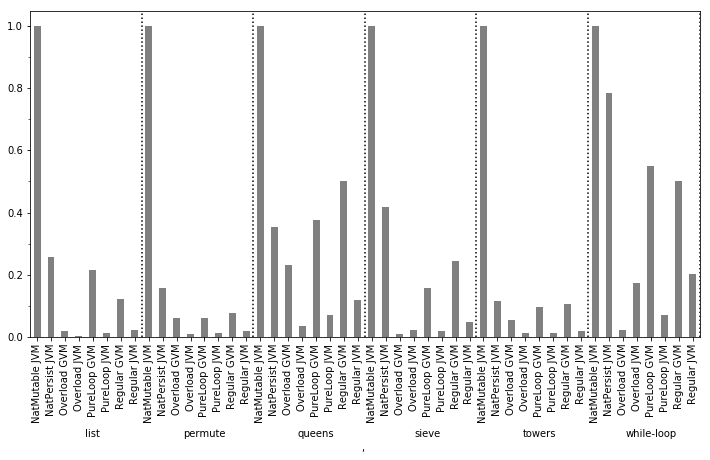

In [6]:
speedups.index.names = ['',' ']
ax = speedups.plot(kind="bar", figsize=(12, 6), color="Gray")
minor_locator = ticker.AutoMinorLocator(2)

ax.yaxis.set_minor_locator(minor_locator)
ax.set_xticklabels(speedups.index.get_level_values(1))
ax.set_xticklabels(speedups.index.get_level_values(0).unique(), minor=True)
ax.set_xticks(np.arange(4, len(speedups), 8), minor=True)

ax.tick_params(axis='x', which='minor', direction='out', pad=90)

ax.patch.set_alpha(0.5)

for x in np.arange(7, 48, 8):
    plt.axvline(x=x+.5, color='k', linestyle=":")

# plt.savefig("tiger-speedups.pdf", format='pdf', bbox_inches='tight')
plt.show()